In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score

In [0]:
data = pd.read_csv("/Volumes/qa/ud_agsocebi/ud_agsoce/Balaji Nagarajan/train.csv")
test = pd.read_csv("/Volumes/qa/ud_agsocebi/ud_agsoce/Balaji Nagarajan/test.csv")

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())
print(test.head())

First few rows of the dataset:
   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]
   PassengerId  Pclass  ... Cabin Embarked
0          892       3  ...   NaN        Q
1          893       3  ...   NaN        S
2          894       2  ...   NaN        Q
3          895       3  ...   NaN        S
4          896       3  ...   NaN        S

[5 rows x 11 columns]


In [0]:
# Display the summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(data.describe(include='all'))


Summary statistics of the dataset:
        PassengerId    Survived      Pclass  ...        Fare    Cabin  Embarked
count    891.000000  891.000000  891.000000  ...  891.000000      204       889
unique          NaN         NaN         NaN  ...         NaN      147         3
top             NaN         NaN         NaN  ...         NaN  B96 B98         S
freq            NaN         NaN         NaN  ...         NaN        4       644
mean     446.000000    0.383838    2.308642  ...   32.204208      NaN       NaN
std      257.353842    0.486592    0.836071  ...   49.693429      NaN       NaN
min        1.000000    0.000000    1.000000  ...    0.000000      NaN       NaN
25%      223.500000    0.000000    2.000000  ...    7.910400      NaN       NaN
50%      446.000000    0.000000    3.000000  ...   14.454200      NaN       NaN
75%      668.500000    1.000000    3.000000  ...   31.000000      NaN       NaN
max      891.000000    1.000000    3.000000  ...  512.329200      NaN       NaN

[11

In [0]:
# Display the data types of each column
print("\nData types of each column:")
print(data.dtypes)


Data types of each column:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [0]:
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


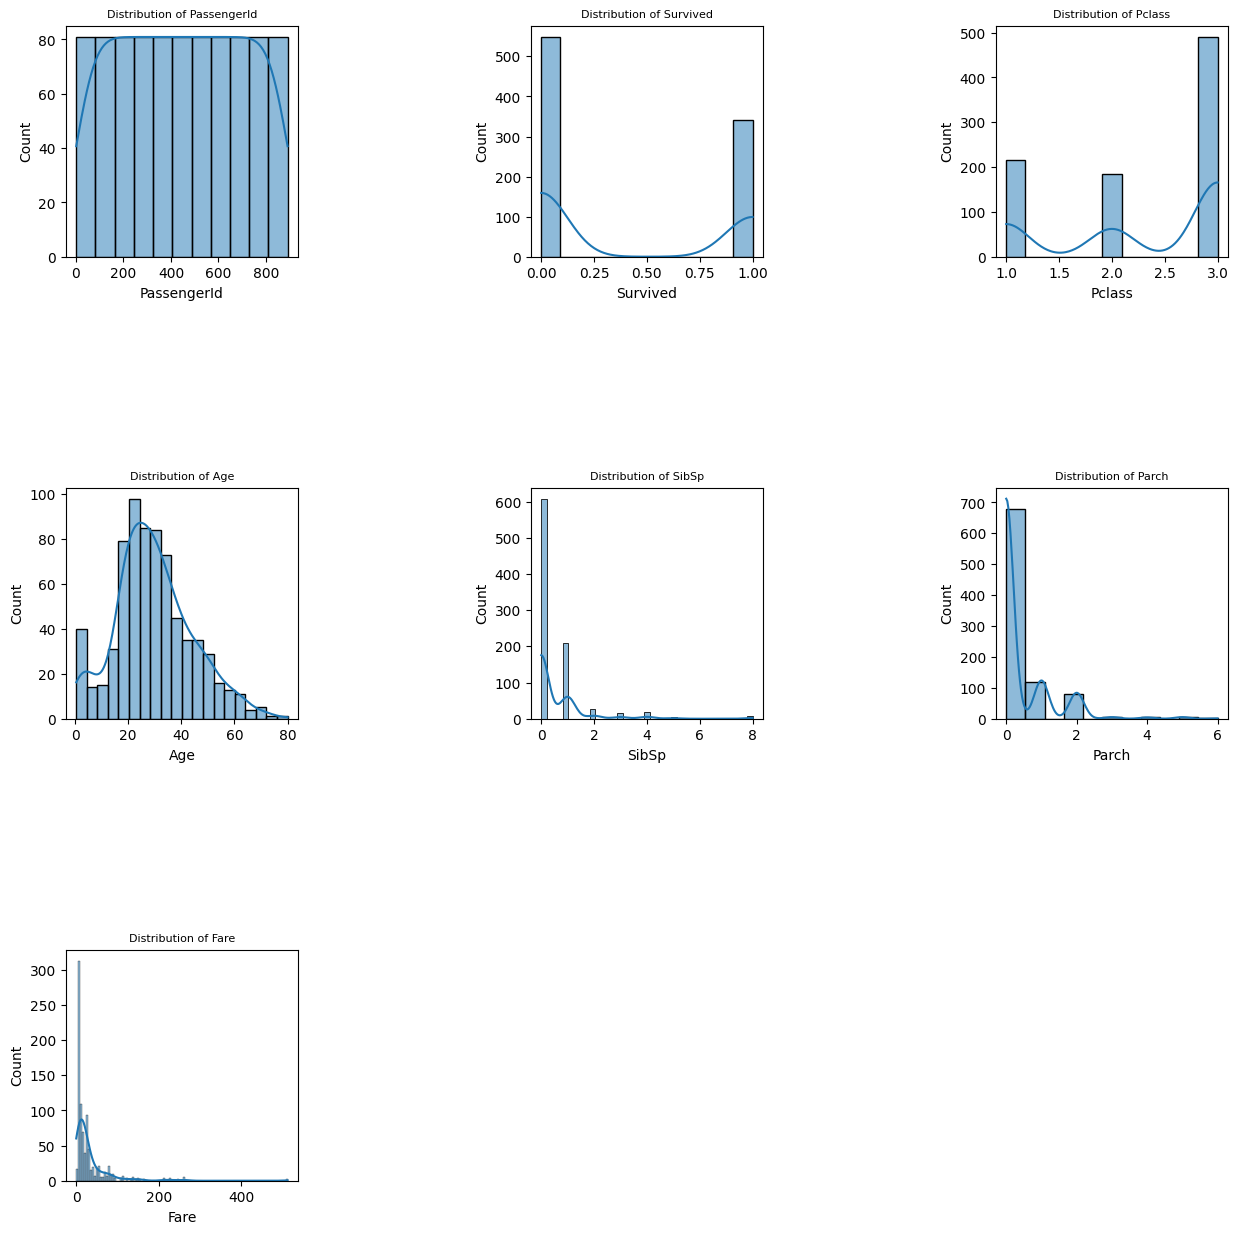

In [0]:
# Visualize the distribution of numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15 , 15))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}', fontsize=8)  # Reduce the title size
plt.subplots_adjust(hspace=1, wspace=1)  # Adjust the spacing
plt.show()

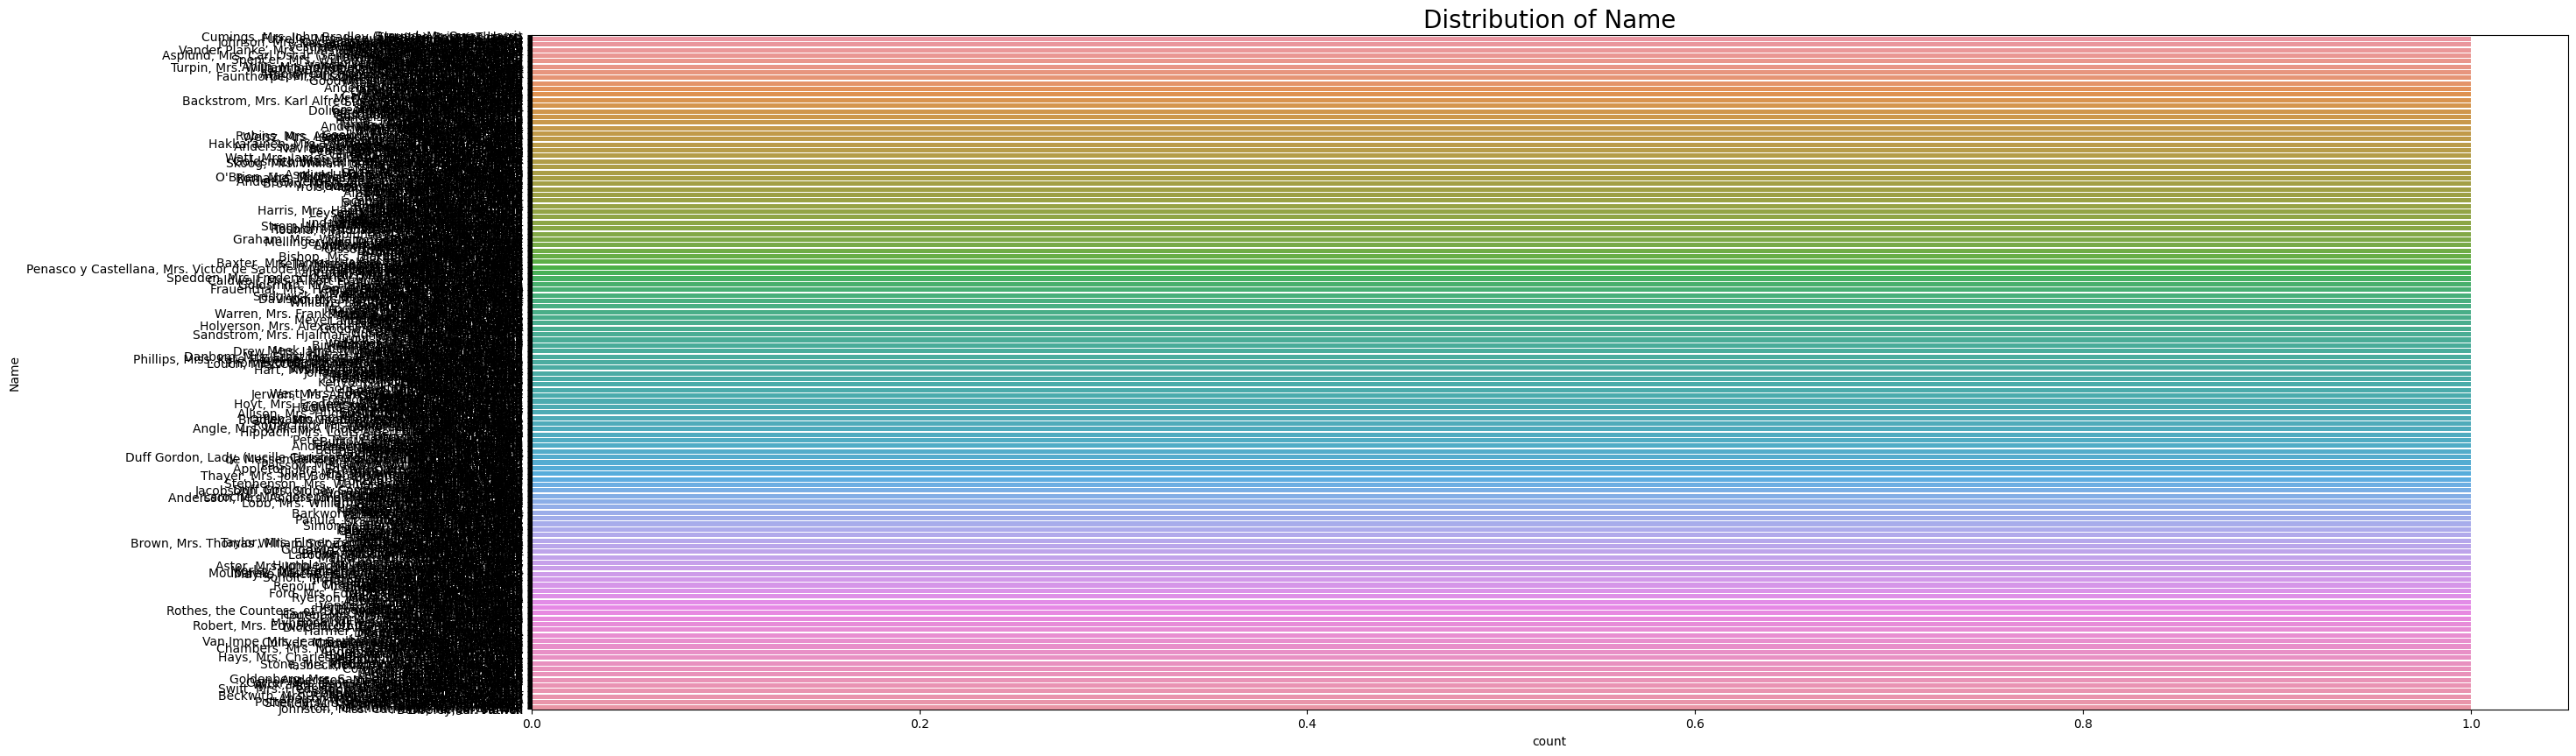

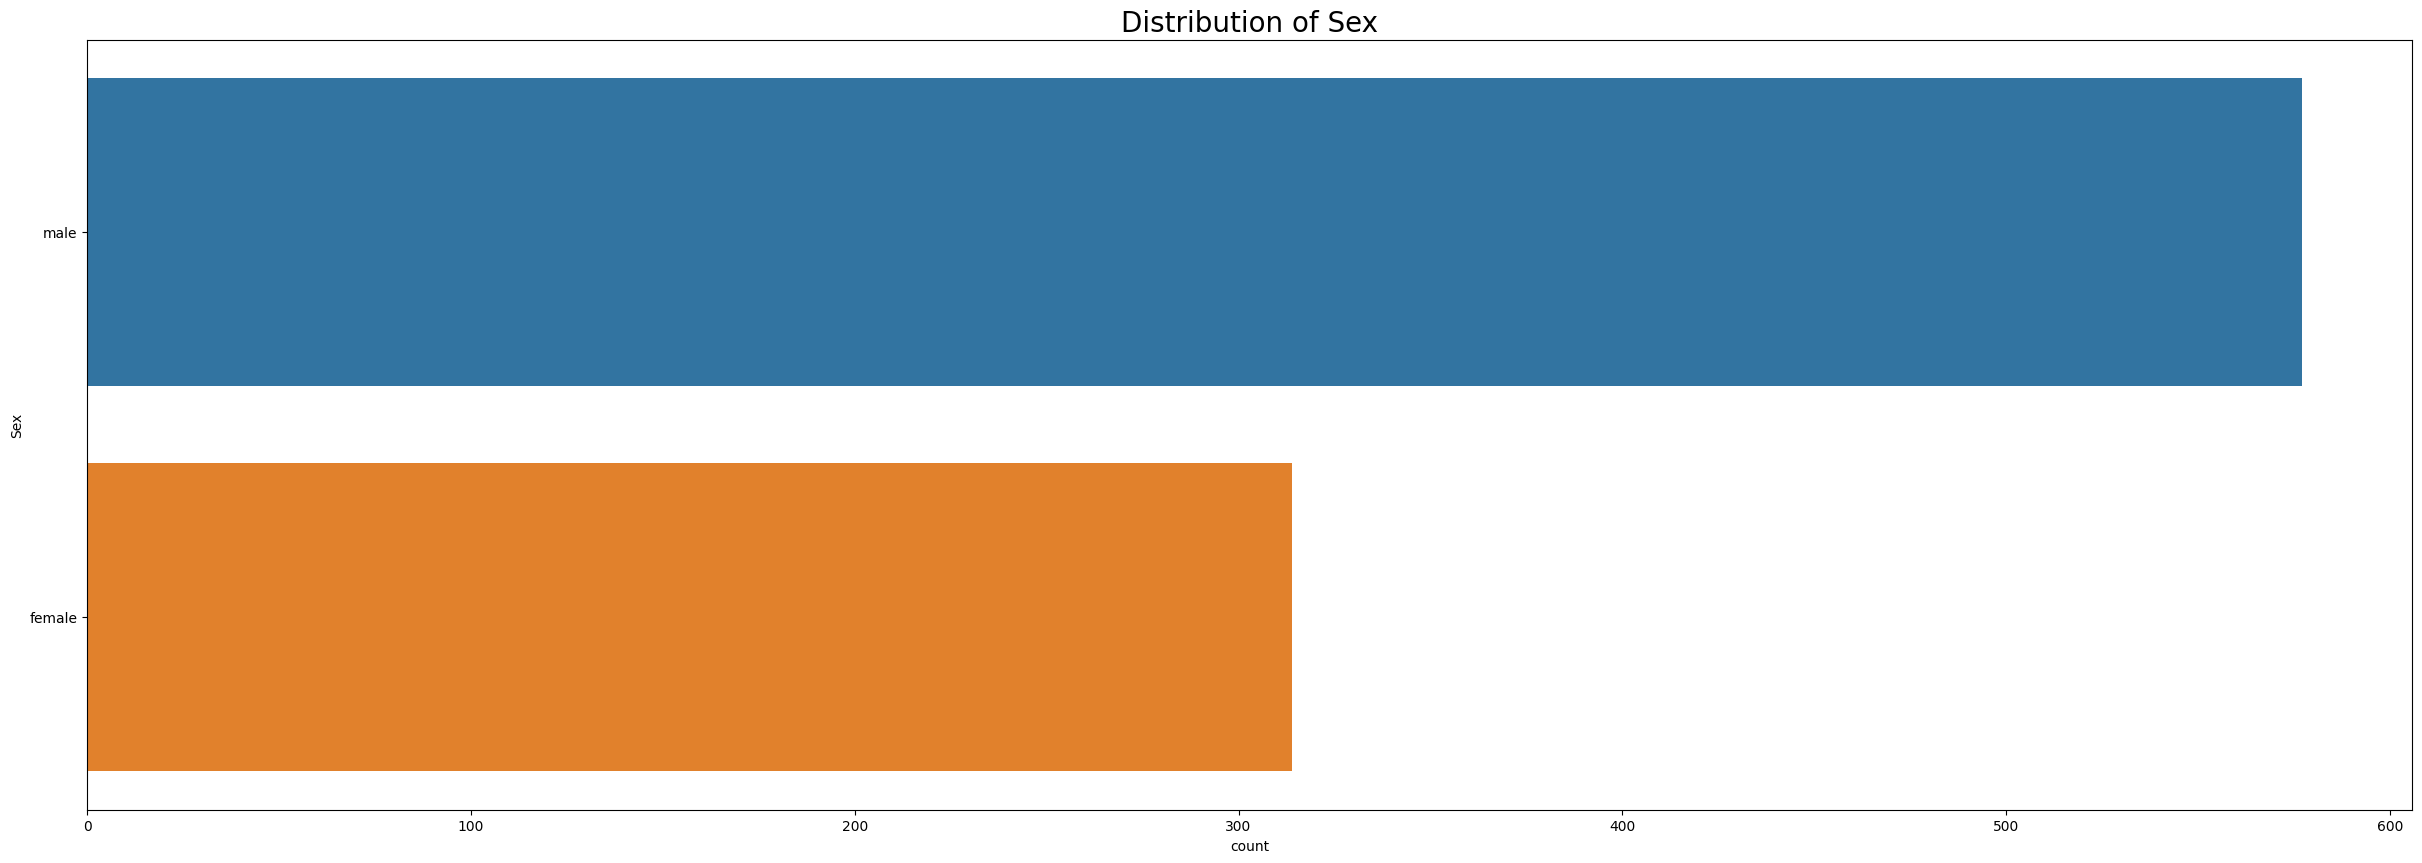

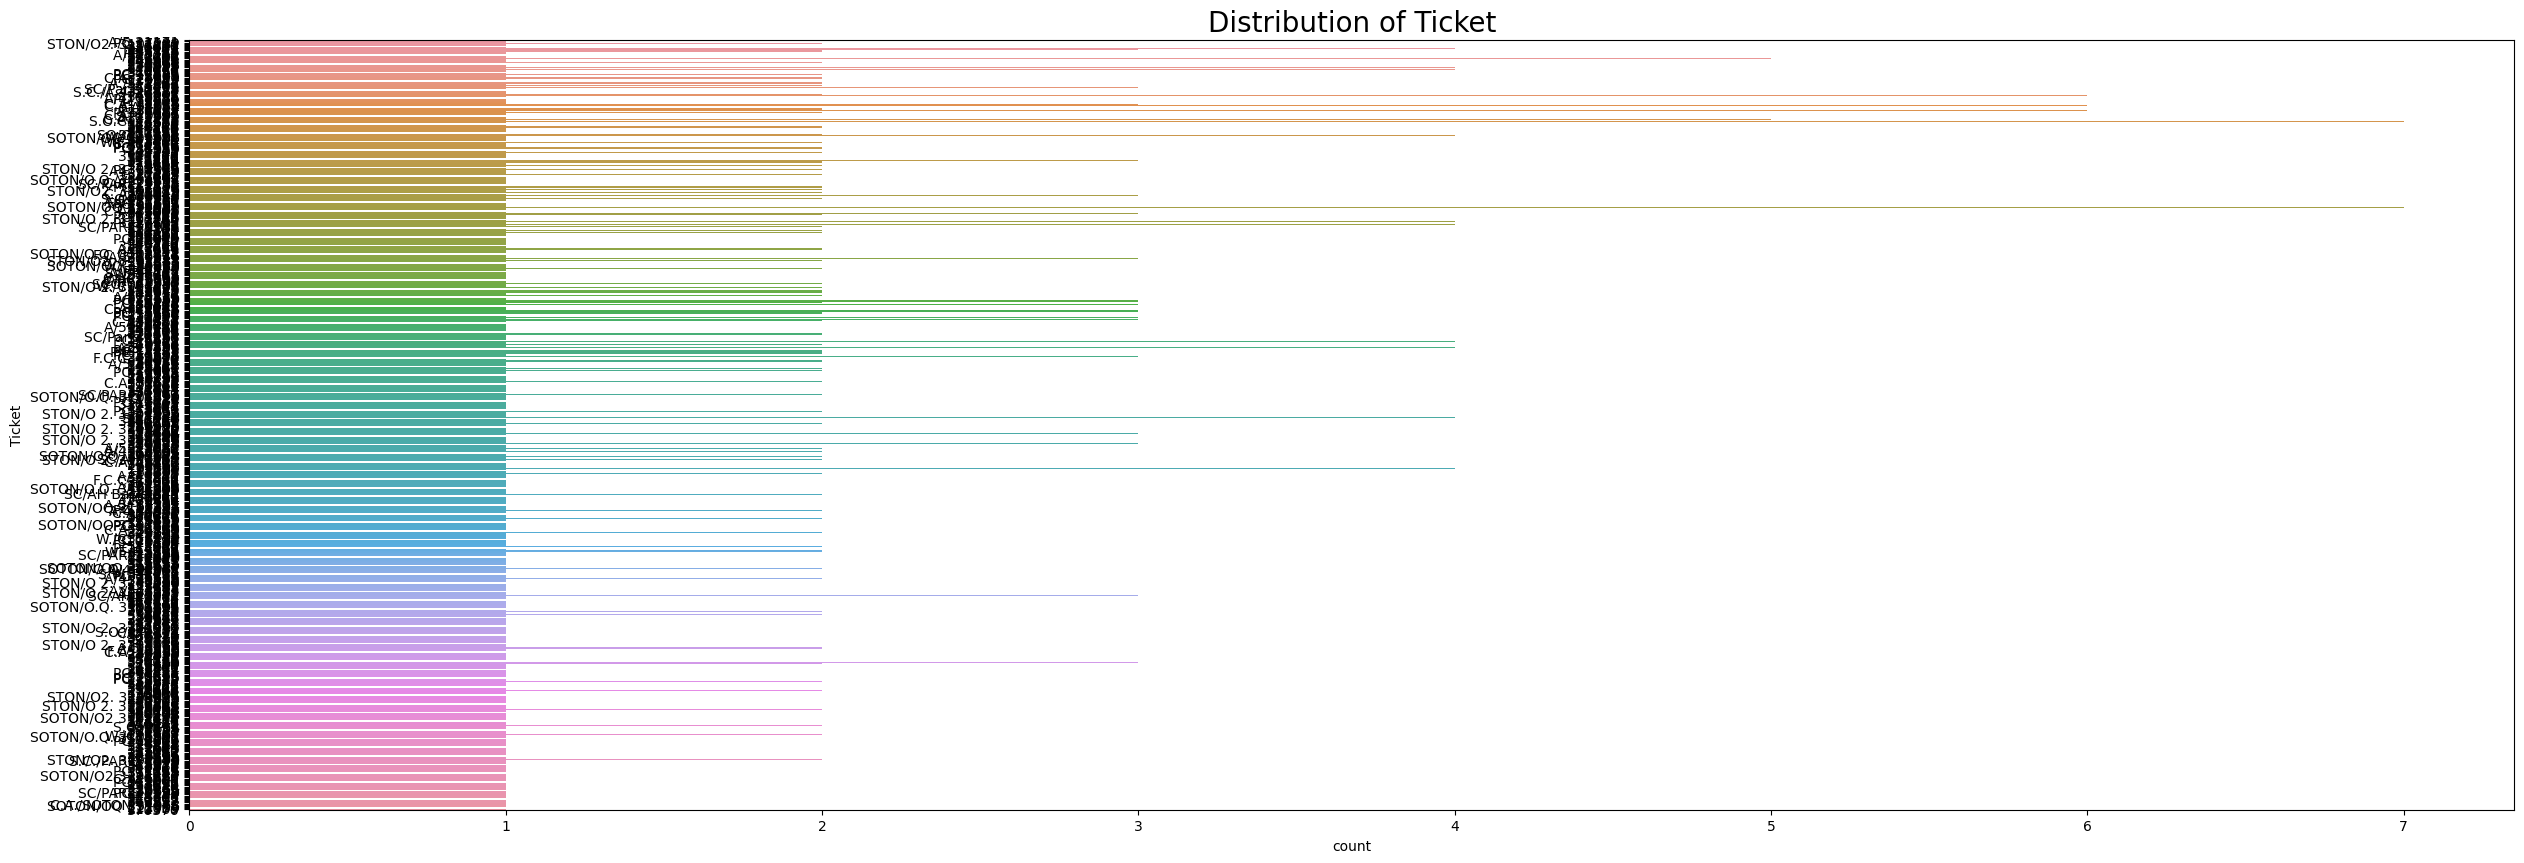

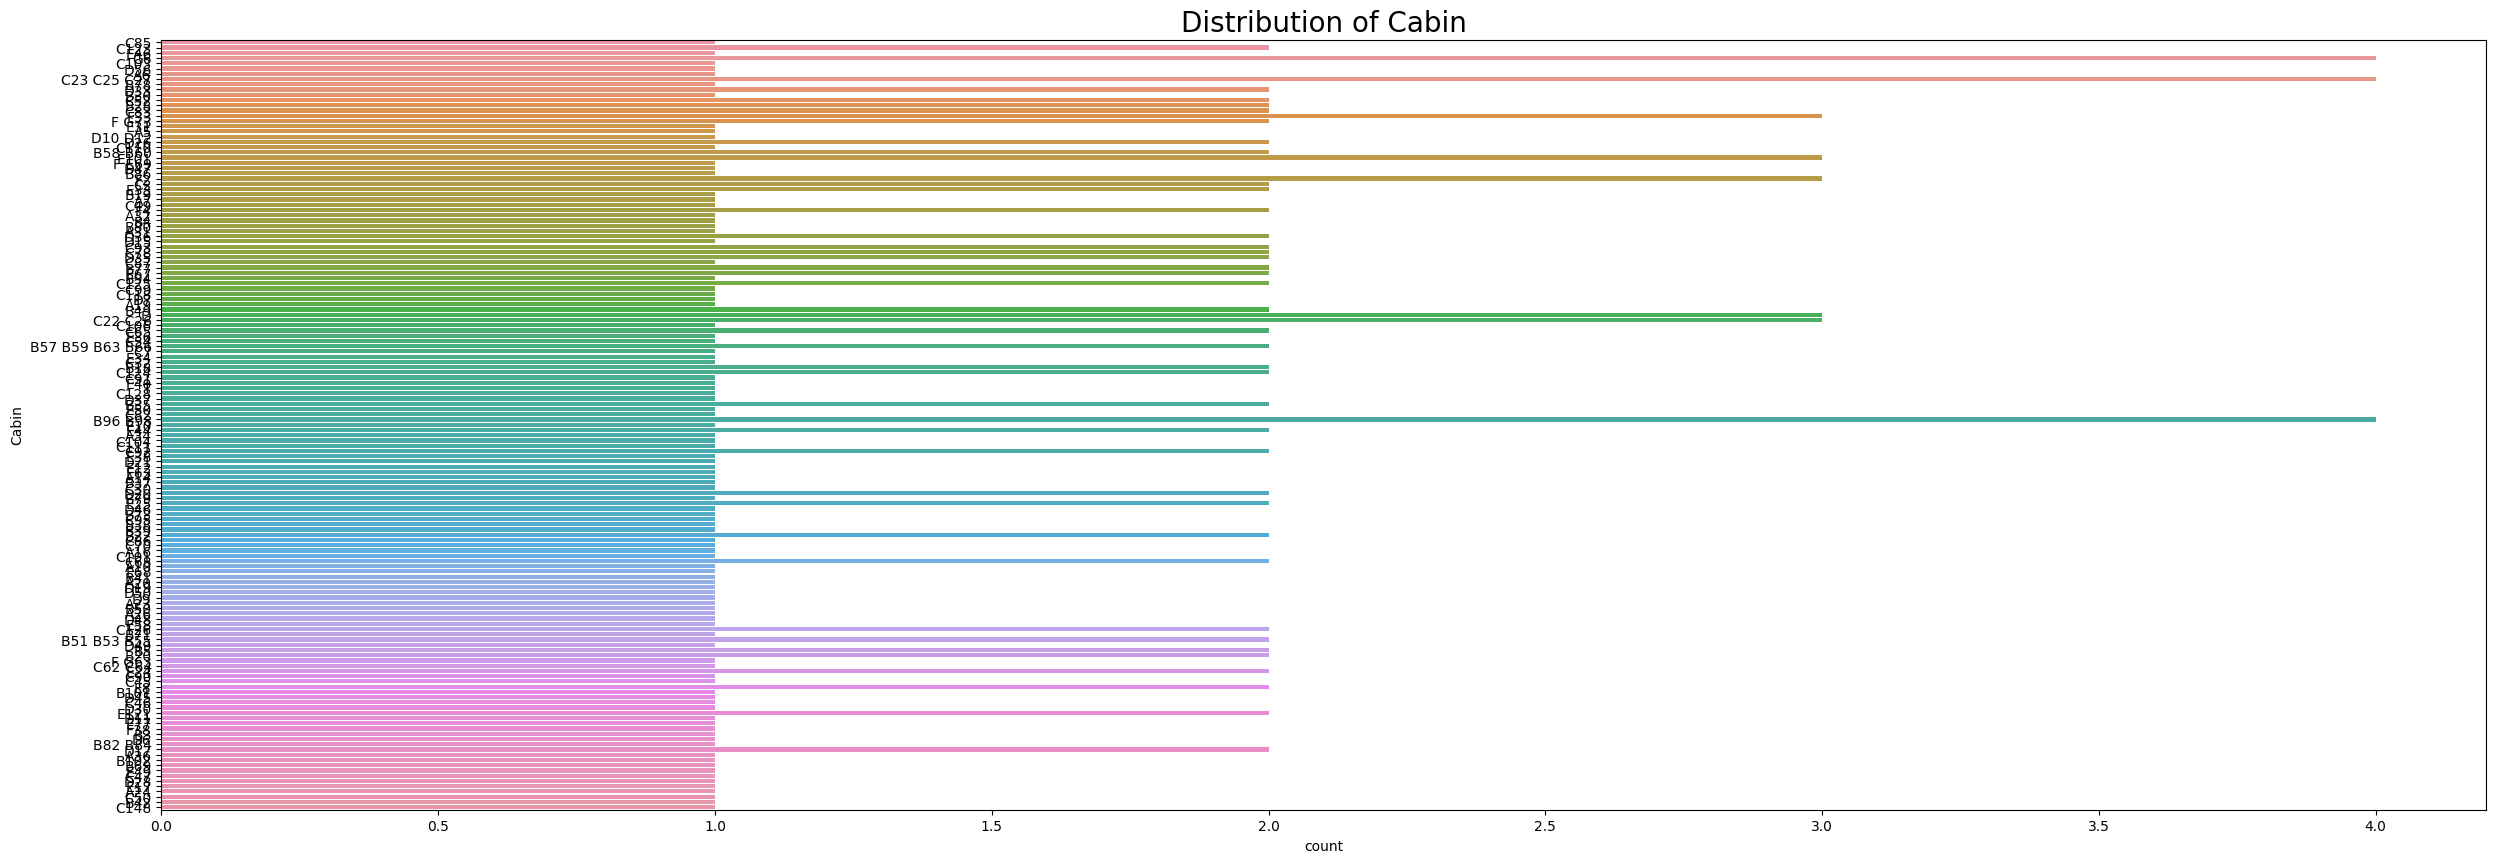

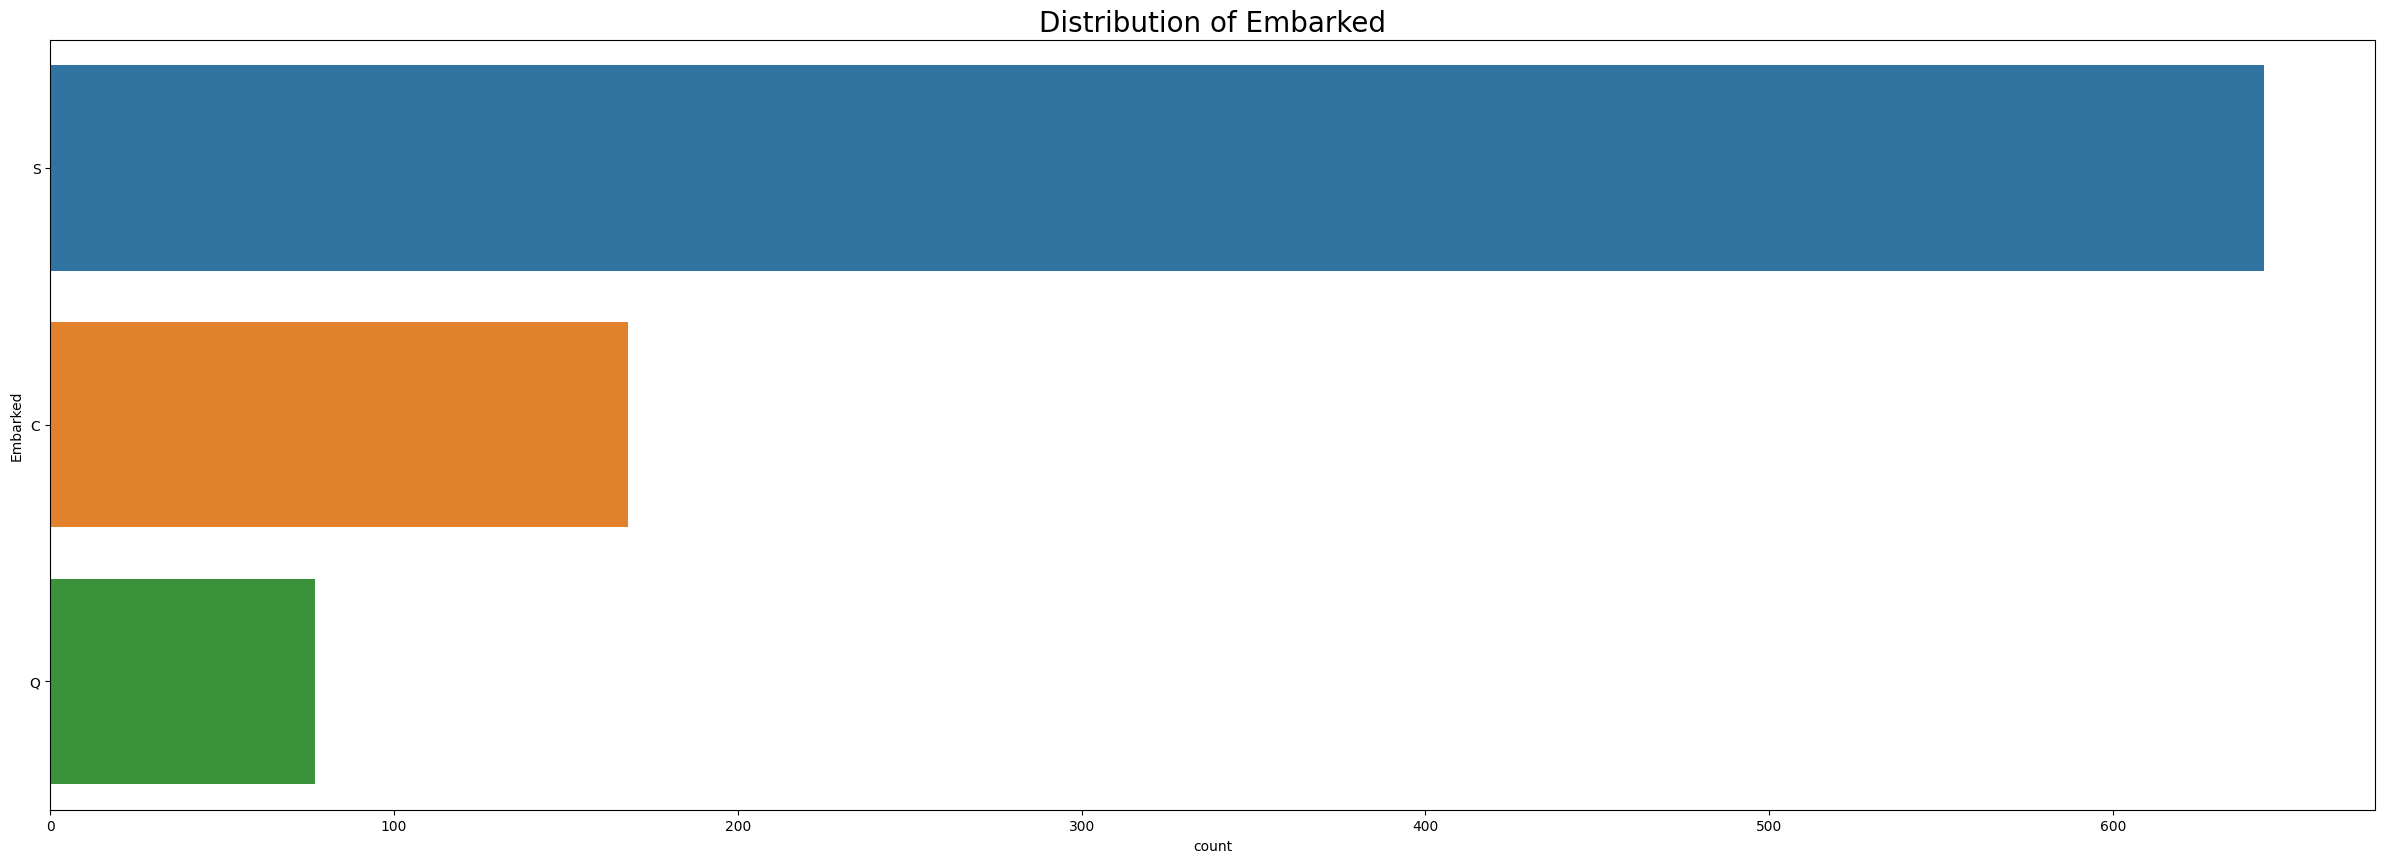

In [0]:
# Visualize the distribution of categorical features
categorical_features = data.select_dtypes(include=['object']).columns

for i, col in enumerate(categorical_features):
    plt.figure(figsize=(30, 10))  # One chart per row and make it bigger
    sns.countplot(y=data[col].dropna())
    plt.title(f'Distribution of {col}', fontsize=20)  # Reduce the title size
    plt.show()

In [0]:
#Feature Selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.preprocessing import StandardScaler


# Preprocessing steps
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data['IsAlone'] = (data['FamilySize'] == 1).astype(int)
data['Title'] = data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
data['Fare'] = np.log1p(data['Fare'])

# Feature selection using Random Forest
X = data[['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Embarked_Q', 'Embarked_S']]
y = data['Survived']

model = RandomForestClassifier()
model.fit(X, y)
importances = model.feature_importances_

In [0]:
# Select top features based on importance
selected_features = X.columns[np.argsort(importances)[-8:]]

print("Selected Features:", selected_features)

Selected Features: Index(['Embarked_Q', 'IsAlone', 'Embarked_S', 'FamilySize', 'Pclass', 'Sex',
       'Age', 'Fare'],
      dtype='object')


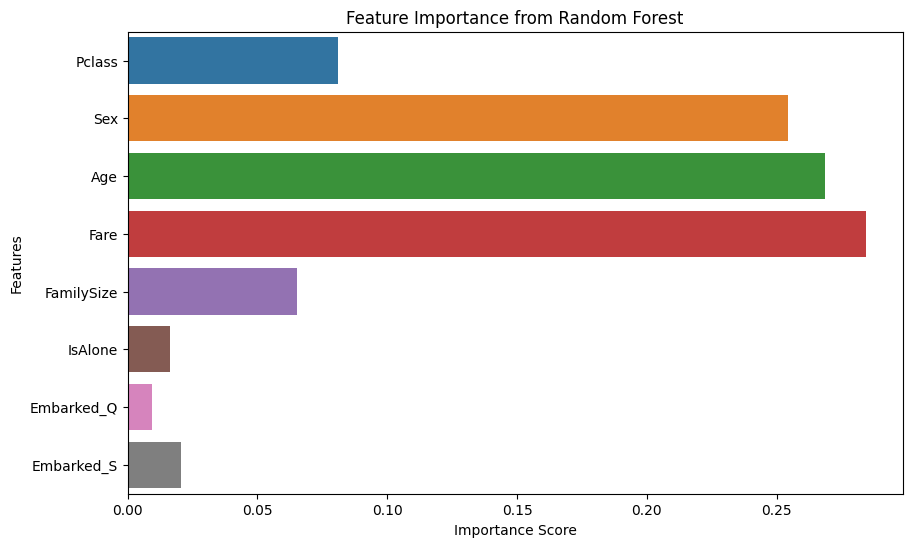

In [0]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=X.columns)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

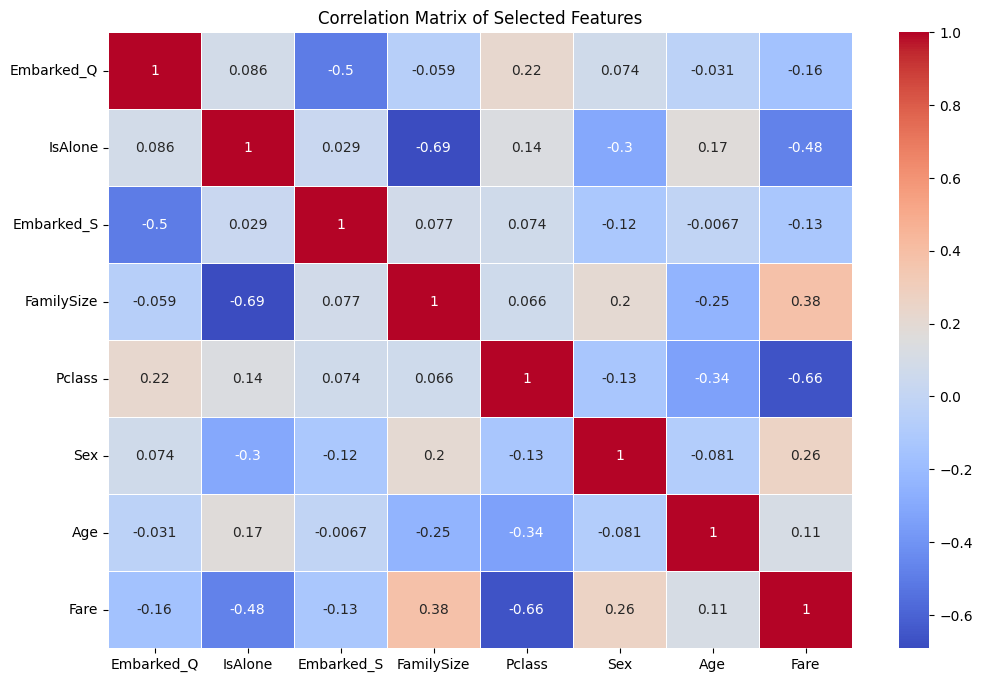

In [0]:
# Correlation matrix visualization
plt.figure(figsize=(12, 8))
correlation_matrix = data[selected_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Selected Features')
plt.show()

In [0]:
#Feature Extraction
# Standardize the features before applying PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [0]:
# Train a Random Forest model on the original selected features for comparison
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model_orig = RandomForestClassifier()
model_orig.fit(X_train_orig, y_train_orig)

RandomForestClassifier()

In [0]:
# Predict and evaluate the model performance on original features
y_pred_orig = model_orig.predict(X_test_orig)
accuracy_orig = accuracy_score(y_test_orig, y_pred_orig)
precision_orig = precision_score(y_test_orig, y_pred_orig)
recall_orig = recall_score(y_test_orig, y_pred_orig)
f1_orig = f1_score(y_test_orig, y_pred_orig)
roc_auc_orig = roc_auc_score(y_test_orig, y_pred_orig)


In [0]:
print("\nModel Performance with Original Features:")
print(f"Accuracy: {accuracy_orig}")
print(f"Precision: {precision_orig}")
print(f"Recall: {recall_orig}")
print(f"F1-Score: {f1_orig}")
print(f"ROC-AUC: {roc_auc_orig}")




Model Performance with Original Features:
Accuracy: 0.8379888268156425
Precision: 0.8
Recall: 0.8108108108108109
F1-Score: 0.8053691275167786
ROC-AUC: 0.8339768339768341


In [0]:
# Create new features based on domain knowledge
from sklearn.preprocessing import PolynomialFeatures
# Interaction terms between Pclass and Sex
data['Pclass_Sex'] = data['Pclass'] * data['Sex']
# Polynomial features for Age and Fare
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(data[['Age', 'Fare']])
poly_feature_names = poly.get_feature_names_out(['Age', 'Fare'])
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)
# Combine new features with original selected features
data = pd.concat([data[selected_features], poly_df, data[['Pclass_Sex']], data[['Survived']]], axis=1)

In [0]:
data

,Embarked_Q,IsAlone,Embarked_S,FamilySize,Pclass,Sex,Age,Fare,Age,Fare,Age^2,Age Fare,Fare^2,Pclass_Sex,Survived
0,0,0,1,2,3,0,22.0,2.110213,22.0,2.110213,484.0,46.424690,4.453000,0,0
1,0,0,0,2,1,1,38.0,4.280593,38.0,4.280593,1444.0,162.662539,18.323477,1,1
2,0,1,1,1,3,1,26.0,2.188856,26.0,2.188856,676.0,56.910265,4.791092,3,1
3,0,0,1,2,1,1,35.0,3.990834,35.0,3.990834,1225.0,139.679197,15.926757,1,1
4,0,1,1,1,3,0,35.0,2.202765,35.0,2.202765,1225.0,77.096767,4.852173,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,1,1,2,0,27.0,2.639057,27.0,2.639057,729.0,71.254548,6.964624,0,0
887,0,1,1,1,1,1,19.0,3.433987,19.0,3.433987,361.0,65.245757,11.792268,1,1
888,0,0,1,4,3,1,28.0,3.196630,28.0,3.196630,784.0,89.505646,10.218445,3,0
889,0,1,0,1,1,0,26.0,3.433987,26.0,3.433987,676.0,89.283667,11.792268,0,1


In [0]:
# New features
X_poly = data.drop(columns=['Survived'])
y_poly = data['Survived']


In [0]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_poly, test_size=0.2, random_state=42)

# Train a Random Forest model on the new features
model_new_features = RandomForestClassifier()
model_new_features.fit(X_train, y_train)

# Predict and evaluate the model performance with new features
y_pred_new_features = model_new_features.predict(X_test)
accuracy_new_features = accuracy_score(y_test, y_pred_new_features)
precision_new_features = precision_score(y_test, y_pred_new_features)
recall_new_features = recall_score(y_test, y_pred_new_features)
f1_new_features = f1_score(y_test, y_pred_new_features)
roc_auc_features = roc_auc_score(y_test, y_pred_new_features)


In [0]:
# Print the results
print("Model Performance with New Features:")
print(f"Accuracy: {accuracy_new_features}")
print(f"Precision: {precision_new_features}")
print(f"Recall: {recall_new_features}")
print(f"F1-Score: {f1_new_features}")
print(f"ROC-AUC: {roc_auc_features}")

Model Performance with New Features:
Accuracy: 0.8156424581005587
Precision: 0.7887323943661971
Recall: 0.7567567567567568
F1-Score: 0.7724137931034482
ROC-AUC: 0.806949806949807


In [0]:
!pip3 install imbalanced-learn==0.8.0
# Apply SMOTE to handle imbalanced data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_poly)

# Split the resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train a Random Forest model on the resampled data
model_resampled = RandomForestClassifier()
model_resampled.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate the model performance with resampled data
y_pred_resampled = model_resampled.predict(X_test_resampled)
accuracy_resampled = accuracy_score(y_test_resampled, y_pred_resampled)
precision_resampled = precision_score(y_test_resampled, y_pred_resampled)
recall_resampled = recall_score(y_test_resampled, y_pred_resampled)
f1_resampled = f1_score(y_test_resampled, y_pred_resampled)
roc_auc_resampled = roc_auc_score(y_test_resampled, y_pred_resampled)

# Print the results
print("Model Performance with Resampled Data:")
print(f"Accuracy: {accuracy_resampled}")
print(f"Precision: {precision_resampled}")
print(f"Recall: {recall_resampled}")
print(f"F1-Score: {f1_resampled}")
print(f"ROC-AUC: {roc_auc_resampled}")




[notice] A new release of pip available: 22.2.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Model Performance with Resampled Data:
Accuracy: 0.8318181818181818
Precision: 0.8508771929824561
Recall: 0.8290598290598291
F1-Score: 0.8398268398268399
ROC-AUC: 0.8320056426852543


In [0]:
#Original Features model performance
results_orig_features = {
    f'Model': 'Original features',
    f'Accuracy': accuracy_orig,
    f'Precision': precision_orig,
    f'Recall': recall_orig,
    f'F1-Score': f1_orig,
    f'ROC-AUC': roc_auc_orig
}
# Create a DataFrame to display the results in a table format
results_df = pd.DataFrame([results_orig_features])

# Display the results
print(results_df)


               Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Original features  0.837989        0.8  0.810811  0.805369  0.833977


In [0]:
#New Features model performance
results_new_features = {
    f'Model': 'With new features',
    f'Accuracy': accuracy_new_features,
    f'Precision': precision_new_features,
    f'Recall': recall_new_features,
    f'F1-Score': f1_new_features,
    f'ROC-AUC': roc_auc_features
}
# Create a DataFrame to display the results in a table format
results_df_new_feat = pd.DataFrame([results_new_features])

# Display the results
print(results_df_new_feat)

               Model  Accuracy  Precision    Recall  F1-Score  ROC-AUC
0  With new features  0.815642   0.788732  0.756757  0.772414  0.80695


In [0]:
#Resampled model performance
results_resampled = {
    f'Model': 'With resampled data',
    f'Accuracy': accuracy_resampled,
    f'Precision': precision_resampled,
    f'Recall': recall_resampled,
    f'F1-Score': f1_resampled,
    f'ROC-AUC': roc_auc_resampled
}
# Create a DataFrame to display the results in a table format
results_df_resampled = pd.DataFrame([results_resampled])

# Display the results
print(results_df_resampled)

                 Model  Accuracy  Precision   Recall  F1-Score   ROC-AUC
0  With resampled data  0.831818   0.850877  0.82906  0.839827  0.832006


In [0]:

from sklearn.feature_selection import SelectKBest, chi2, RFE, mutual_info_classif
from sklearn.linear_model import LassoCV


In [0]:

# 1. Recursive Feature Elimination (RFE)
rfe_model = RandomForestClassifier()
rfe_selector = RFE(rfe_model, n_features_to_select=5)
X_rfe_selected = rfe_selector.fit_transform(X_scaled, y)

# Convert X_scaled to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Mr', 'Title_Mrs', 'Title_Miss'])  # feature_names should be a list of column names

# Get the selected features
selected_features = rfe_selector.support_

# Print the selected features
print("Selected features by RFE:")
print(X_scaled_df.columns[selected_features])

X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(X_rfe_selected, y, test_size=0.2, random_state=42)
rfe_model.fit(X_train_rfe, y_train_rfe)

y_pred_rfe = rfe_model.predict(X_test_rfe)
accuracy_rfe = accuracy_score(y_test_rfe, y_pred_rfe)
precision_rfe = precision_score(y_test_rfe, y_pred_rfe)
recall_rfe = recall_score(y_test_rfe, y_pred_rfe)
f1_rfe = f1_score(y_test_rfe, y_pred_rfe)
roc_auc_rfe = roc_auc_score(y_test_rfe, y_pred_rfe)

results_rfe_features = {
    f'Model': 'RFE',
    f'Accuracy': accuracy_rfe,
    f'Precision': precision_rfe,
    f'Recall': recall_rfe,
    f'F1-Score': f1_rfe,
    f'ROC-AUC': roc_auc_rfe}

results_rfe_df = pd.concat([results_df, pd.DataFrame([results_rfe_features])], ignore_index=True)

# Display the results
print(results_rfe_df)


Selected features by RFE:
Index(['FamilySize', 'IsAlone', 'Embarked_Q', 'Title_Mr', 'Title_Miss'], dtype='object')
               Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Original features  0.837989   0.800000  0.810811  0.805369  0.833977
1                RFE  0.815642   0.780822  0.770270  0.775510  0.808945


In [0]:

# 2. Mutual Information
mi_selector = SelectKBest(mutual_info_classif, k=5)
X_mi_selected = mi_selector.fit_transform(X_scaled, y)

# Convert X_scaled to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Mr', 'Title_Mrs', 'Title_Miss'])  # feature_names should be a list of column names

# Get the selected features
selected_features_mi = mi_selector.get_support()

# Print the selected features
print("Selected features by Mutual Information:")
print(X_scaled_df.columns[selected_features_mi])

X_train_mi, X_test_mi, y_train_mi, y_test_mi = train_test_split(X_mi_selected, y, test_size=0.2, random_state=42)
mi_model = RandomForestClassifier()
mi_model.fit(X_train_mi, y_train_mi)

y_pred_mi = mi_model.predict(X_test_mi)
accuracy_mi = accuracy_score(y_test_mi, y_pred_mi)
precision_mi = precision_score(y_test_mi, y_pred_mi)
recall_mi = recall_score(y_test_mi, y_pred_mi)
f1_mi = f1_score(y_test_mi, y_pred_mi)
roc_auc_mi = roc_auc_score(y_test_mi, y_pred_mi)

results_mi_features = {
    f'Model': 'Mutual Information',
    f'Accuracy': accuracy_mi,
    f'Precision': precision_mi,
    f'Recall': recall_mi,
    f'F1-Score': f1_mi,
    f'ROC-AUC': roc_auc_mi
}

# check_df = pd.DataFrame([results_mi_features])
# print(check_df)
results_mi_df = pd.concat([results_rfe_df, pd.DataFrame([results_mi_features])], ignore_index=True)

# Display the results
print(results_mi_df)

Selected features by Mutual Information:
Index(['Fare', 'IsAlone', 'Embarked_Q', 'Title_Mrs', 'Title_Miss'], dtype='object')
                Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0   Original features  0.837989   0.800000  0.810811  0.805369  0.833977
1                 RFE  0.815642   0.780822  0.770270  0.775510  0.808945
2  Mutual Information  0.826816   0.802817  0.770270  0.786207  0.818468


In [0]:
# 3. Embedded Method (Lasso Regression)
lasso_selector = LassoCV()
lasso_selector.fit(X_scaled, y)
lasso_selected_features_mask = lasso_selector.coef_ != 0
X_lasso_selected = X_scaled[:, lasso_selected_features_mask]

# Convert X_scaled to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Mr', 'Title_Mrs', 'Title_Miss'])  # feature_names should be a list of column names

# Get the selected features
selected_features_lasso = lasso_selected_features_mask

# Print the selected features
print("Selected features by Mutual Information:")
print(X_scaled_df.columns[selected_features_lasso])

X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X_lasso_selected, y, test_size=0.2, random_state=42)
lasso_model = RandomForestClassifier()
lasso_model.fit(X_train_lasso, y_train_lasso)

y_pred_lasso = lasso_model.predict(X_test_lasso)
accuracy_lasso = accuracy_score(y_test_lasso, y_pred_lasso.round())
precision_lasso = precision_score(y_test_lasso, y_pred_lasso.round())
recall_lasso = recall_score(y_test_lasso.round(), y_pred_lasso.round())
f1_lasso = f1_score(y_test_lasso.round(), y_pred_lasso.round())
roc_auc_lasso = roc_auc_score(y_test_lasso.round(), y_pred_lasso.round())

results_lasso_features = {
    f'Model': 'Lasso Regression',
    f'Accuracy': accuracy_lasso,
    f'Precision': precision_lasso,
    f'Recall': recall_lasso,
    f'F1-Score': f1_lasso,
    f'ROC-AUC': roc_auc_lasso
  }

# check_df = pd.DataFrame([results_mi_features])
# print(check_df)
results_lasso_df = pd.concat([results_mi_df, pd.DataFrame([results_lasso_features])], ignore_index=True)

# Display the results
print(results_lasso_df)


Selected features by Mutual Information:
Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize',
       'IsAlone', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Mr',
       'Title_Mrs', 'Title_Miss'],
      dtype='object')
                Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0   Original features  0.837989   0.800000  0.810811  0.805369  0.833977
1                 RFE  0.815642   0.780822  0.770270  0.775510  0.808945
2  Mutual Information  0.826816   0.802817  0.770270  0.786207  0.818468
3    Lasso Regression  0.793296   0.760563  0.729730  0.744828  0.783912


In [0]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train a Gradient Boosting model on the selected features
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model_gb = GradientBoostingRegressor()
model_gb.fit(X_train, y_train)

# Predict and evaluate the model performance
y_pred_gb = model_gb.predict(X_test)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Gradient Boosting model performance
results_gb_features = {
    f'Model': 'Gradient Boosting',
    f'Mean Absolute Error': mae_gb,
    f'Mean Squared Error': mse_gb,
    f'Root Mean Squared Error': rmse_gb,
    f'R2 Score': r2_gb
  }

# Create a DataFrame to display the results in a table format
results_gb_df = pd.DataFrame([results_gb_features])

# Set pandas display options to show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Display the results
print(results_gb_df)


               Model  Mean Absolute Error  Mean Squared Error  Root Mean Squared Error  R2 Score
0  Gradient Boosting             0.270297            0.143966                 0.379429   0.40633


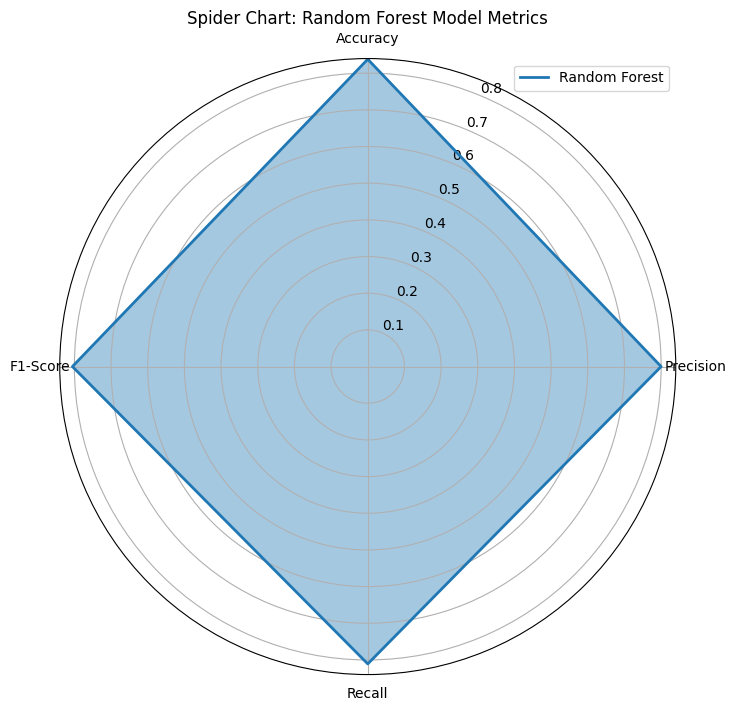

In [0]:
# plots for randomforest model for original
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.metrics import roc_auc_score

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test_orig, y_pred_orig)

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test_orig, y_pred_orig)
roc_auc_rf_curve = auc(fpr_rf, tpr_rf)

# Spider Chart Data Preparation
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values_rf = [accuracy_orig, precision_orig, recall_orig, f1_orig]

# Spider Chart Plotting
fig_spider = plt.figure(figsize=(8, 8))
ax_spider = fig_spider.add_subplot(111, polar=True)
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
values_rf += values_rf[:1]
angles += angles[:1]

ax_spider.set_theta_offset(np.pi / 2)
ax_spider.set_theta_direction(-1)

plt.xticks(angles[:-1], metrics)

ax_spider.plot(angles, values_rf, linewidth=2, linestyle='solid', label='Random Forest')
ax_spider.fill(angles, values_rf, alpha=0.4)

plt.legend(loc='upper right')
plt.title('Spider Chart: Random Forest Model Metrics')
plt.show()


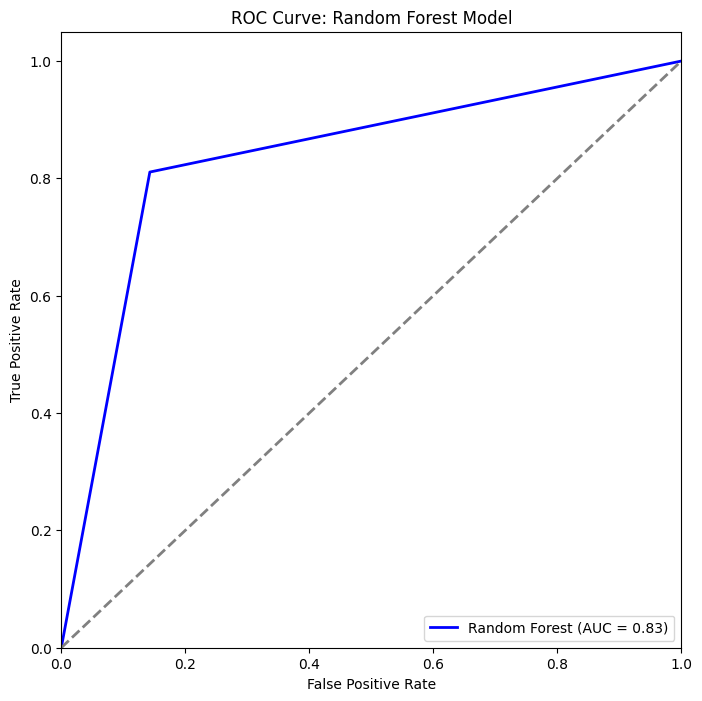

In [0]:

# ROC Curve Plotting for original
fig_roc = plt.figure(figsize=(8, 8))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf_curve)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Random Forest Model')
plt.legend(loc='lower right')
plt.show()


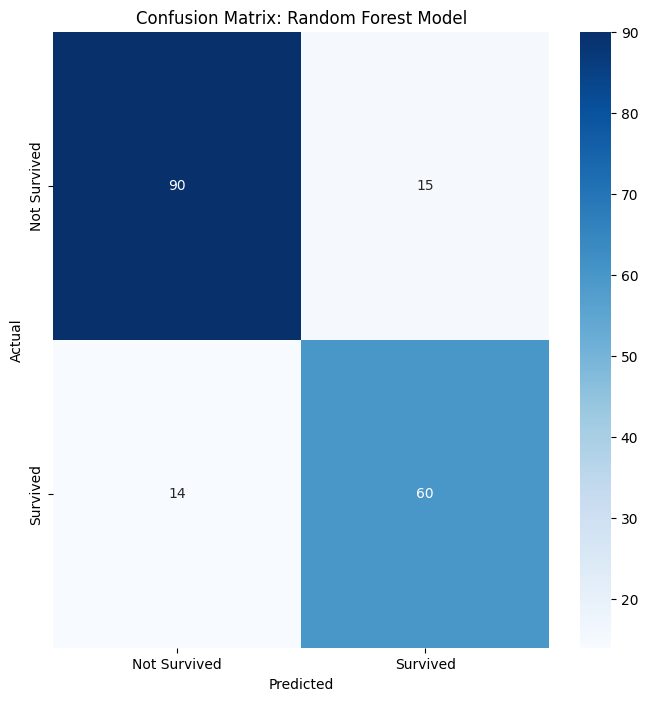

In [0]:
# Confusion Matrix Plotting for original
fig_conf_matrix = plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Random Forest Model')
plt.show()


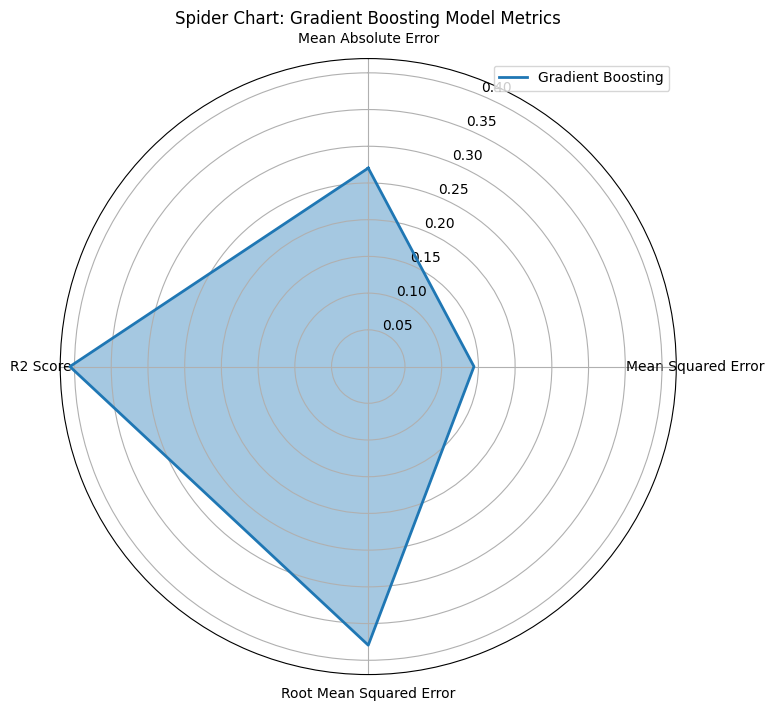

In [0]:
#For Regression - Spider Chart Plotting


# Spider Chart Data Preparation
metrics = ['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'R2 Score']
values_gb = [mae_gb, mse_gb, rmse_gb, r2_gb]
#Spider Chart Plotting
fig_spider = plt.figure(figsize=(8, 8))
ax_spider = fig_spider.add_subplot(111, polar=True)
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
values_gb += values_gb[:1]
angles += angles[:1]

ax_spider.set_theta_offset(np.pi / 2)
ax_spider.set_theta_direction(-1)

plt.xticks(angles[:-1], metrics)

ax_spider.plot(angles, values_gb, linewidth=2, linestyle='solid', label='Gradient Boosting')
ax_spider.fill(angles, values_gb, alpha=0.4)

plt.legend(loc='upper right')
plt.title('Spider Chart: Gradient Boosting Model Metrics')
plt.show()


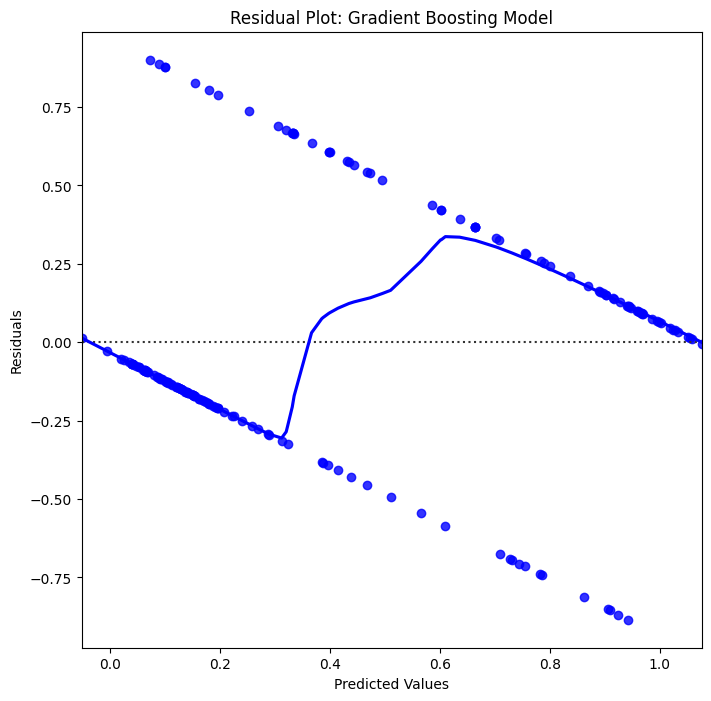

In [0]:

# Residual Plot for GB
residuals_gb = y_test - y_pred_gb

fig_residuals = plt.figure(figsize=(8, 8))
sns.residplot(x=y_pred_gb, y=residuals_gb, lowess=True, color='blue')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot: Gradient Boosting Model')
plt.show()


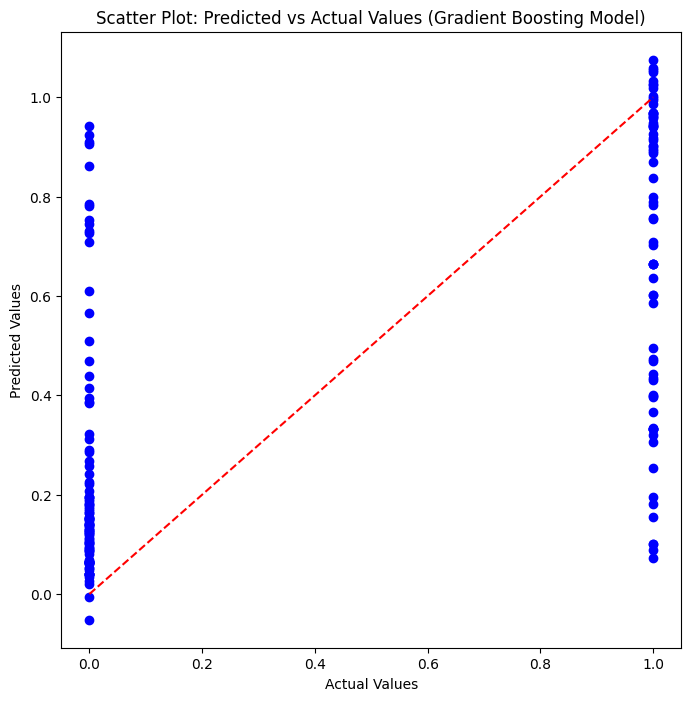

In [0]:

# Scatter Plot: Predicted vs Actual Values for GB
fig_scatter = plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_gb, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot: Predicted vs Actual Values (Gradient Boosting Model)')
plt.show()


# Part 3: Reserach on Interpretability Issues

## Interpretability Studies on Recursive Fearure Elimination (RFE) and Mutual Information

### Recursive Feature Elimination (RFE)

#### Benefits

##### Improved Model Perfromance
RFE enhances model performance by systematically removing less important features, leading to a more focused and efficient model (Theng & Bhoyar, 2023).
##### Flexibility
RFE can be applied with various machine learning models, including Random Forest (RF) and Support Vector Machines (SVM) and making it versatile (Theng & Bhoyar, 2023).
##### Visulization
Advanced implementations of RFE, such as SVM-RFE, allow visualization of feature importance through non-linear kernels, aiding in the identification of key predictors (Sanz et al., 2018)

#### Limitations
##### Computationally Intensive
RFE can be computationally expensive, especially with large datasets and complex models (Theng & Bhoyar, 2023).
##### Model Dependency
The importance scores used in RFE are model-dependent, meaning they vary with different models and datasets. This variability can lead to confusion about which features are genuinely important (Theng & Bhoyar, 2023).
#### Interpretability Challenges
##### Iterative Nature
The iterative process of RFE, where features are recursively removed, can make it difficult to understand the final model (Theng & Bhoyar, 2023).
##### Complexity
The complexity of RFE, especially when combined with non-linear models, can hinder interpretability. Advanced implementations like SVM-RFE improve visualization but still face challenges in explaining the interactions between features (Sanz et al., 2018).

### Mutual Information

#### Benefits

##### Captures Non-Linear Relationships
Mutual information measures the dependency between features and the target variable, capturing complex non-linear relationships that traditional correlation measures might miss (Francis & Sun, 2024).
##### Robustness
Mutual information estimators are robust in detecting asymmetric relationships, providing better detection ability than Pearson’s or Spearman’s correlation coefficients (Francis & Sun, 2024).
##### Comprehensive Analysis
Incorporating mutual information in feature selection can result in a more comprehensive analysis, uncovering intricate relationships in the data (Francis & Sun, 2024).

#### Limitations

Mutual information does not provide a clear explanation of how features interact with each other or contribute to the model's predictions. This lack of transparency can hinder the interpretability of the model (Tahirović & Krivić, 2023).

#### Challenges

Mutual information methods can be seen as black-box approaches, where the underlying interactions between features are not easily interpretable.

There is often a trade-off between capturing complex relationships and maintaining interpretability. While mutual information can uncover intricate dependencies, it can also obscure the understanding of feature importance (Francis & Sun, 2024).

### Reflection on Interpretability Issues and Their Influence on Results
#### Intuitiveness and Alignment with Domain Knowledge
##### Original Features
The original features selected (Embarked_Q, IsAlone, Embarked_S, FamilySize, Pclass, Sex, Age, Fare) are intuitive and align well with domain knowledge. These features are commonly recognized as important factors influencing survival rates on the Titanic. For instance, Pclass and Fare reflect socio-economic status, Sex and Age indicate demographic priorities during evacuation, and FamilySize and IsAlone provide insights into travel characteristics.

##### RFE Selected Features
The features selected by RFE (FamilySize, IsAlone, Embarked_Q, Title_Mr, Title_Miss) are somewhat intuitive but include titles (Title_Mr, Title_Miss) which may not be as straightforward. While titles can provide additional demographic information, their inclusion might not be as intuitive as other features like Pclass or Fare.

##### Mutual Information Selected Features
The features selected by mutual information (Fare, IsAlone, Embarked_Q, Title_Mrs, Title_Miss) are also somewhat intuitive but include titles (Title_Mrs, Title_Miss). The inclusion of titles can provide demographic insights but might not be as directly related to survival as features like Pclass or Sex.

##### Lasso Regression Selected Features
The features selected by Lasso regression (Pclass, Sex, Age, SibSp, Parch, Fare, FamilySize, IsAlone, Embarked_C, Embarked_Q, Embarked_S, Title_Mr, Title_Mrs, Title_Miss) are comprehensive and align well with domain knowledge. This method includes a wide range of features, providing a detailed understanding of factors influencing survival.

####vStakeholders' Understanding of Model Behavior
##### Enhancement
The original features and those selected by Lasso regression enhance stakeholders' understanding of the model's behavior. These features are well-known and intuitive, making it easier for stakeholders to grasp the factors influencing survival rates.
##### Hindrance
The features selected by RFE and mutual information might hinder stakeholders' understanding due to the inclusion of titles. While titles can provide demographic insights, they are not as directly related to survival as other features. This can lead to confusion and reduce the interpretability of the model.

#### Trade-offs Between Performance and Interpretability
#####vPerformance
The original features provided the highest accuracy (0.837989), precision (0.800000), recall (0.810811), F1-score (0.805369), and ROC-AUC (0.833977). This indicates that the original features are highly effective in predicting survival rates.

##### Interpretability
While the original features and those selected by Lasso regression are intuitive and align well with domain knowledge, the features selected by RFE and mutual information might reduce interpretability due to the inclusion of titles. This can make it challenging for stakeholders to understand the model's behavior.

##### Trade-offs
There is a clear trade-off between performance and interpretability. The original features provide the best performance but might include features that are less intuitive. On the other hand, methods like RFE and mutual information might select features that are less intuitive, reducing interpretability but potentially improving performance.


### Recommendations for Improving Feature Selection in 
#### Combining Multiple Methods
Using a combination of feature selection methods can provide a more comprehensive understanding of feature importance and interactions. For example, combining RFE with mutual information can enhance both performance and interpretability (Theng & Bhoyar, 2023).

#### Leveraging Explainability Tools
Incorporating explainability tools like SHAP (SHapley Additive exPlanations) can provide insights into feature importance and interactions (Tahirović & Krivić, 2023). These tools can help visualize the contribution of each feature to the model's predictions, making it easier to understand and interpret the model.

#### Domain Expertise
Involving domain experts in the feature selection process can improve the interpretability of the model. Experts can provide valuable insights into the relevance and importance of features based on their knowledge and experience (Theng & Bhoyar, 2023).

#### Regularization Techniques
Using regularization techniques like Ridge regression alongside Lasso can help balance the penalization of coefficients and improve interpretability. Ridge regression can prevent the complete removal of features, providing a more nuanced understanding of feature importance (Francis & Sun, 2024).

#### Visualization
Visualizing the feature selection process and the final model can enhance interpretability. Techniques like heatmaps, bar charts, and scatter plots can help visualize feature importance and interactions (Theng & Bhoyar, 2023). These visualizations can make it easier to understand the model and communicate findings to stakeholders.

By implementing these recommendations, future projects can improve the interpretability and effectiveness of feature selection methodologies, leading to more robust and understandable models.